## Titanic Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
%matplotlib inline

In [2]:
def loadDF(direction):
    df = pd.read_csv(direction)
    print("La información es: \n {}".format(df.info()))
    print("Los primeros elementos son: \n {}".format(df.head()))
    print("La información estadística es: \n {}".format(df.describe()))
    return df

In [3]:
#Importamos el csv
df_titanic = pd.read_csv("C:/Users/Alumno/Downloads/FPBD/titanic.csv")

In [4]:
print(df_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
#Imprimimos los primeros elementos del DF
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Datos estadísticos
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_titanic2 = loadDF("C:/Users/Alumno/Downloads/FPBD/titanic.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
La información es: 
 None
Los primeros elementos son: 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4       

## Exploración de los datos

C:\Users\Alumno\AppData\Local\Temp\ipykernel_14360\3810637920.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Title', data = df_titanic2, palette="hls")


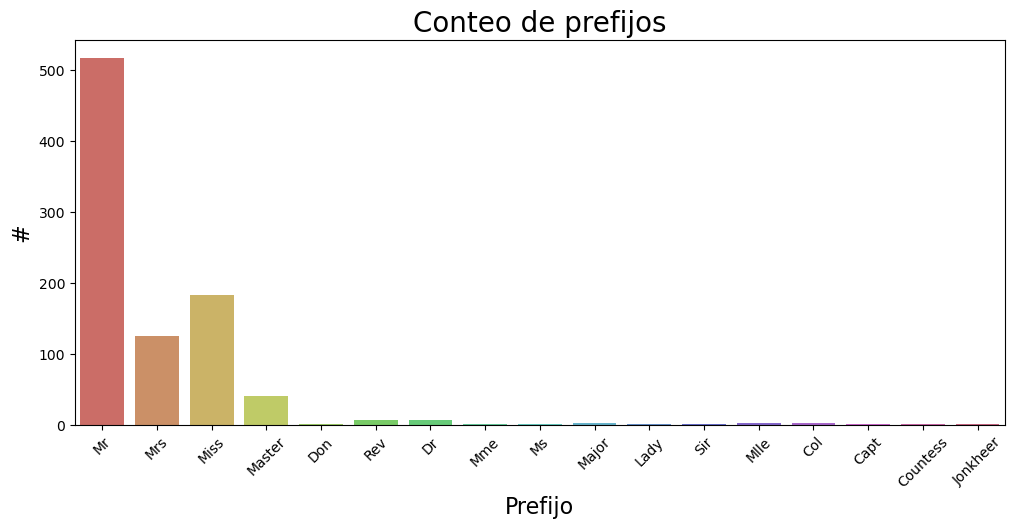

In [8]:
#Imrpimir los prefijos de los pasajeros
#Extraemos los prefijos buscando las letras A-Z y a-z amtes de un punto
df_titanic2['Title'] = df_titanic2.Name.apply(lambda x: re.search('([A-Z][a-z]+)\.',x).group(1))

#Construimos nuestro plot
plt.figure(figsize=(12,5))
sns.countplot(x='Title', data = df_titanic2, palette="hls")
plt.xlabel("Prefijo", fontsize=16)
plt.ylabel("#", fontsize=16)
plt.title("Conteo de prefijos", fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [9]:
#Asignarles una etiqueta de estatus social
Dic_titulo = {
    "Capt" : "Oficial",
    "Col" : "Oficial",
    "Major" : "Oficial",
    "Dr" : "Oficial",
    "Rev" : "Oficial",
    "Jonkheer" : "Realeza",
    "Don" : "Realeza",
    "the Countess" : "Realeza",
    "Dona": "Realeza",
    "Lady" :  "Realeza",
    "Mme" : "Mrs",
    "Mrs" : "Mrs",
    "Ms" : "Mrs",
    "Mlle" : "Miss",
    "Miss" : "Miss",
    "Mr" : "Mr",
    "Master" : "Master"
}
df_titanic2['Title'] = df_titanic2.Title.map(Dic_titulo)

oportunidades de sobrevivir: 
Title
Master     0.575000
Miss       0.701087
Mr         0.156673
Mrs        0.795276
Oficial    0.277778
Realeza    0.333333
Name: Survived, dtype: float64


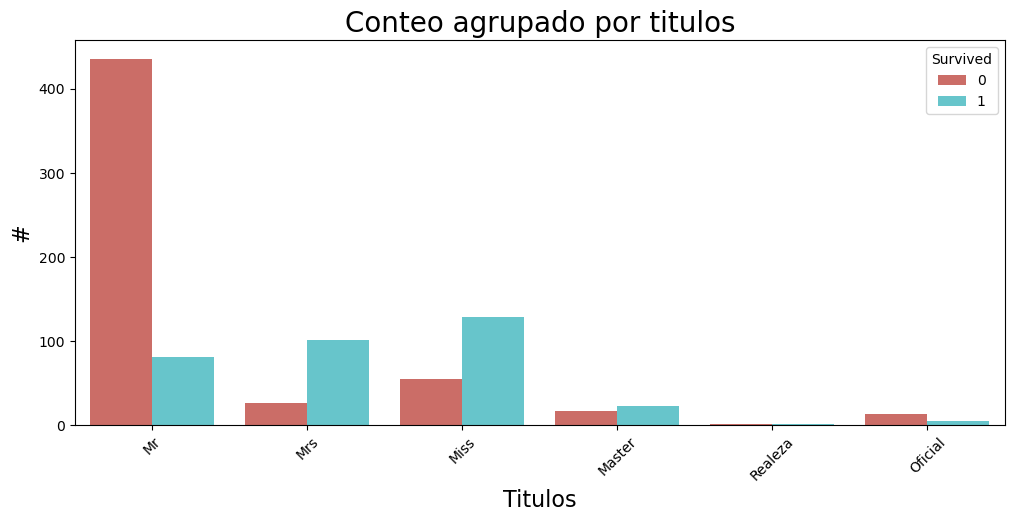

In [10]:
#Filtramos las personas que sobrevivieron de acuerdo a su titulo
print("oportunidades de sobrevivir: ")
print(df_titanic2.groupby("Title")["Survived"].mean())
plt.figure(figsize=(12,5))

sns.countplot(x='Title', data=df_titanic2, palette="hls", hue="Survived")
plt.xlabel("Titulos", fontsize=16)
plt.ylabel("#", fontsize=16)
plt.title("Conteo agrupado por titulos", fontsize=20)
plt.xticks(rotation=45)
plt.show()

C:\Users\Alumno\AppData\Local\Temp\ipykernel_14360\4000669603.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edad_mayor_cero_muerto["Age"], bins=24, color='r')
C:\Users\Alumno\AppData\Local\Temp\ipykernel_14360\4000669603.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edad_mayor_cero_v

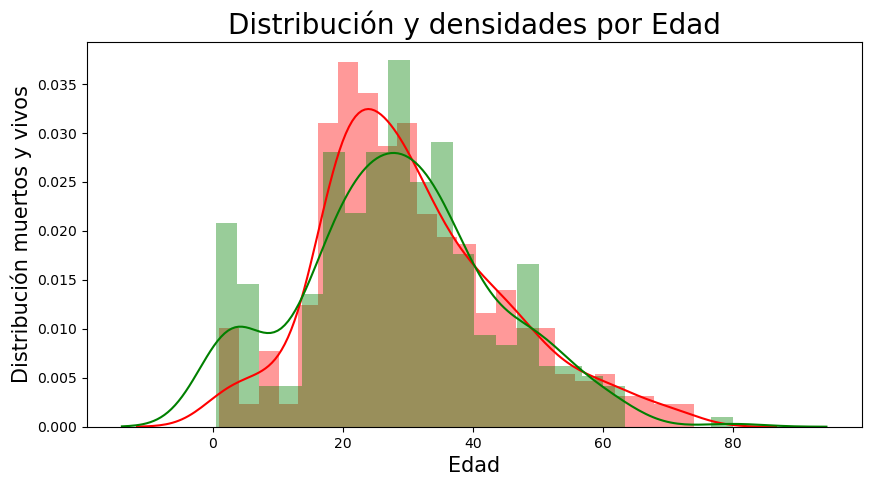

In [11]:
#Sobrevivencia por edades
#Filtramos si sobrevivieron personas con edades mayores a 0
edad_mayor_cero_muerto = df_titanic2[(df_titanic2["Age"]>0) & (df_titanic2["Survived"] == 0)]
edad_mayor_cero_vivo = df_titanic2[(df_titanic2["Age"]>0) & (df_titanic2["Survived"] == 1)]

plt.figure(figsize=(10,5))
sns.distplot(edad_mayor_cero_muerto["Age"], bins=24, color='r')
sns.distplot(edad_mayor_cero_vivo["Age"], bins=24, color='g')
plt.title("Distribución y densidades por Edad", fontsize=20)
plt.xlabel("Edad", fontsize=15)
plt.ylabel("Distribución muertos y vivos", fontsize=15)
plt.show()

In [12]:
#Agrupamos la edad media por sexo, pclass y titulo
grupo_edades = df_titanic2.groupby(["Sex","Pclass","Title"])["Age"]

#Calculamos la mediana
print(grupo_edades.median())
#Para el caso de que tengamos valores NaN's
df_titanic2.loc[df_titanic2.Age.isnull(),'Age'] = df_titanic2.groupby(["Sex","Pclass", "Title"]).Age.transform('median')

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Oficial    49.0
                Realeza    48.0
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Oficial    51.0
                Realeza    39.0
        2       Master      1.0
                Mr         31.0
                Oficial    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64


C:\Users\Alumno\AppData\Local\Temp\ipykernel_14360\2917299539.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_titanic2["Age"], bins = 24)


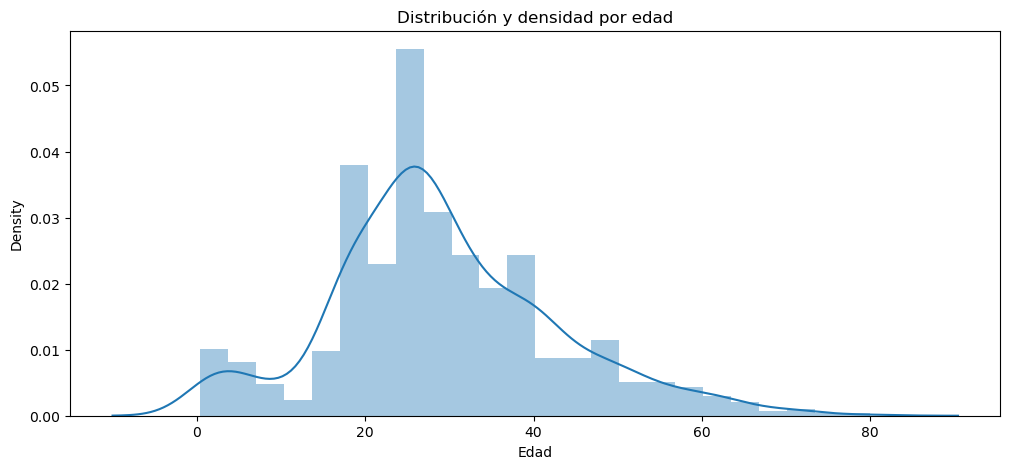

In [13]:
#Ploteamos
plt.figure(figsize= (12,5))

sns.distplot(df_titanic2["Age"], bins = 24)
plt.title("Distribución y densidad por edad")
plt.xlabel("Edad")
plt.show()

C:\Users\Alumno\.conda\envs\new_enviroment\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Alumno\.conda\envs\new_enviroment\lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kw

<Figure size 1200x500 with 0 Axes>

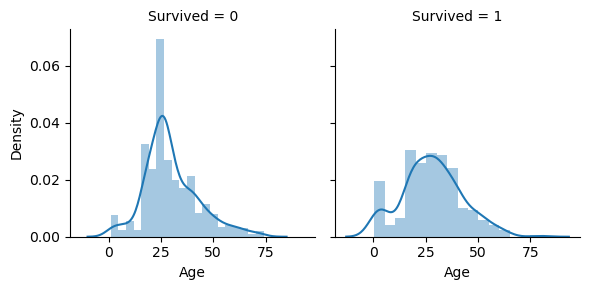

In [14]:
#Ploteo entre sobrevivientes y no
plt.figure(figsize=(12,5))
g = sns.FacetGrid(df_titanic2, col='Survived')
g = g.map(sns.distplot,"Age")
plt.show()

In [18]:
#Crear intervalos de edades
intervalo = (0,5,12,18,25,35,60,120)

#Establecemos nombres para cada categoria
categorias_edad = ["Bebés", "Niños", "Adolescente", "Jovén", "Adulto Jovén", "Adulto", "Anciano"]
#Aplicamos pd.cut
df_titanic2["Edad_cat"] = pd.cut(df_titanic2.Age, intervalo, labels = categorias_edad)
df_titanic2["Edad_cat"].head()

0           Jovén
1          Adulto
2    Adulto Jovén
3    Adulto Jovén
4    Adulto Jovén
Name: Edad_cat, dtype: category
Categories (7, object): ['Bebés' < 'Niños' < 'Adolescente' < 'Jovén' < 'Adulto Jovén' < 'Adulto' < 'Anciano']

C:\Users\Alumno\.conda\envs\new_enviroment\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alumno\.conda\envs\new_enviroment\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 49.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alumno\.conda\envs\new_enviroment\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alumno\.conda\envs\new_enviroment\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alumno\.conda\envs\new_e

<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\Alumno\.conda\envs\new_enviroment\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alumno\.conda\envs\new_enviroment\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alumno\.conda\envs\new_enviroment\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Alumno\.conda\envs\new_enviroment\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


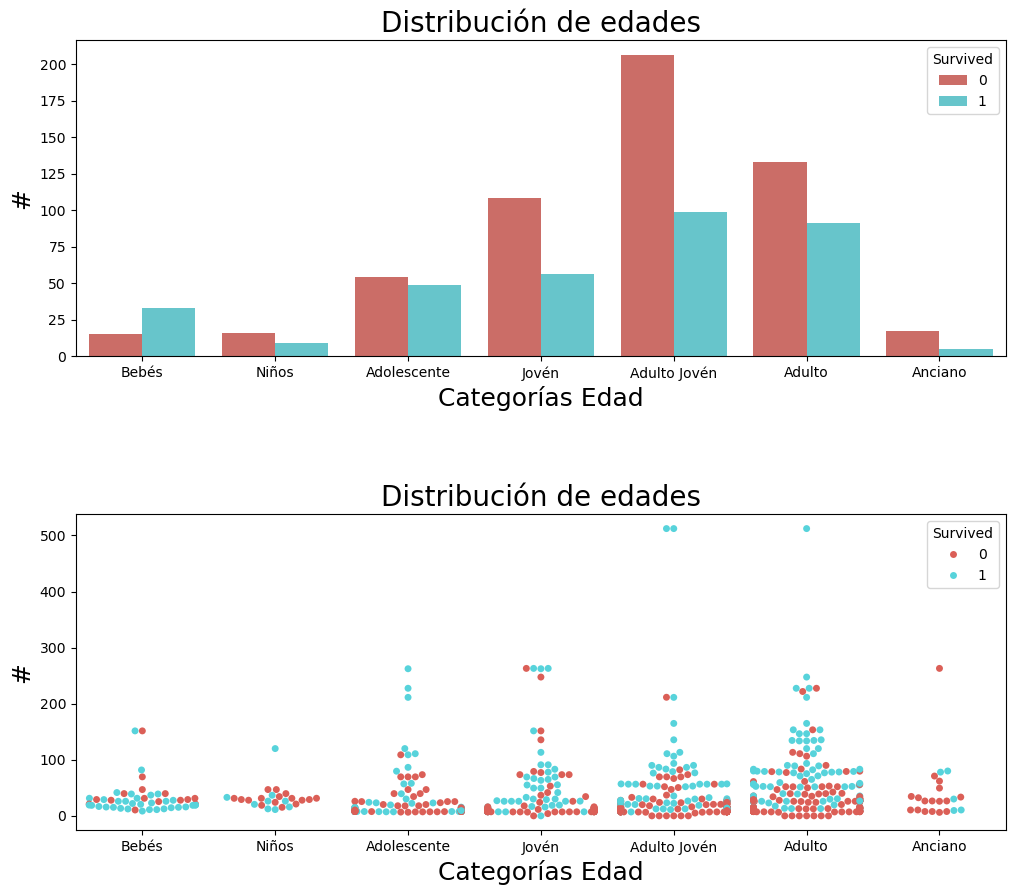

In [19]:
# Ploteo personas que sobrevivieron y no por categoría de edad
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
sns.countplot(x="Edad_cat", data=df_titanic2, hue="Survived", palette="hls")
plt.ylabel("#", fontsize=18)
plt.xlabel("Categorías Edad", fontsize=18)
plt.title("Distribución de edades", fontsize=20)

plt.subplot(2,1,2)
sns.swarmplot(x="Edad_cat", y="Fare", data = df_titanic2, hue="Survived", palette="hls")
plt.ylabel("#", fontsize=18)
plt.xlabel("Categorías Edad", fontsize=18)
plt.title("Distribución de edades", fontsize=20)

plt.subplots_adjust(hspace=0.5, top=0.9)
plt.show

In [31]:
#Ejercicio: Plotear la distribución "Fare" en sobreviviente y no sobreviviente
#Crear intervalos de edades
intervalo = (0, 32, 130, 240, 520)

#Establecemos nombres para cada categoria
categorias_costo_ticket = ["Tercera clase", "Segunda clase", "Primera clase", "Suite", ]
#Aplicamos pd.cut
df_titanic2["Costo_ticket_cat"] = pd.cut(df_titanic2.Fare, intervalo, labels = categorias_costo_ticket)
df_titanic2["Costo_ticket_cat"].head()

0    Tercera clase
1    Segunda clase
2    Tercera clase
3    Segunda clase
4    Tercera clase
Name: Costo_ticket_cat, dtype: category
Categories (4, object): ['Tercera clase' < 'Segunda clase' < 'Primera clase' < 'Suite']

C:\Users\Alumno\.conda\envs\new_enviroment\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\Alumno\.conda\envs\new_enviroment\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 29.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


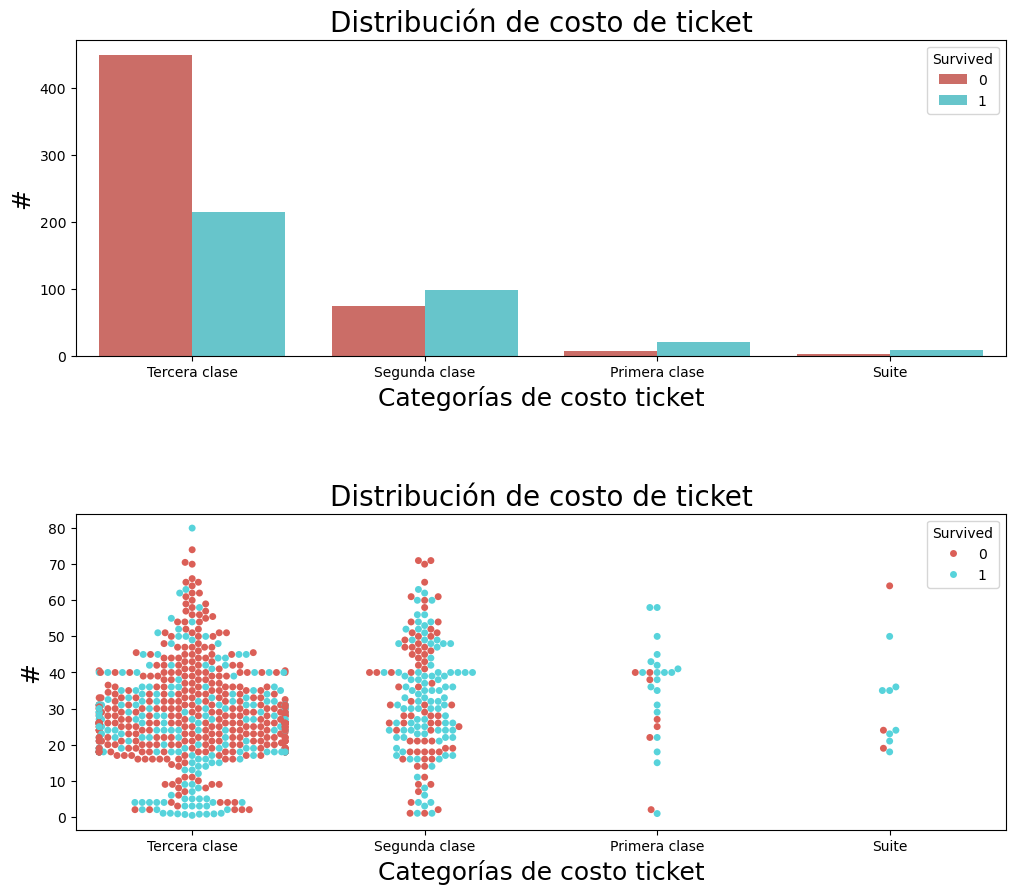

In [32]:
# Ploteo personas que sobrevivieron y no por categoría de costo de ticket
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
sns.countplot(x="Costo_ticket_cat", data=df_titanic2, hue="Survived", palette="hls")
plt.ylabel("#", fontsize=18)
plt.xlabel("Categorías de costo ticket", fontsize=18)
plt.title("Distribución de costo de ticket", fontsize=20)

plt.subplot(2,1,2)
sns.swarmplot(x="Costo_ticket_cat", y="Age", data = df_titanic2, hue="Survived", palette="hls")
plt.ylabel("#", fontsize=18)
plt.xlabel("Categorías de costo ticket", fontsize=18)
plt.title("Distribución de costo de ticket", fontsize=20)

plt.subplots_adjust(hspace=0.5, top=0.9)
plt.show

C:\Users\Alumno\AppData\Local\Temp\ipykernel_14360\1385367858.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fare_muerto["Age"], bins=24, color='r')
C:\Users\Alumno\AppData\Local\Temp\ipykernel_14360\1385367858.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fare_vivo["Age"], bins=24, c

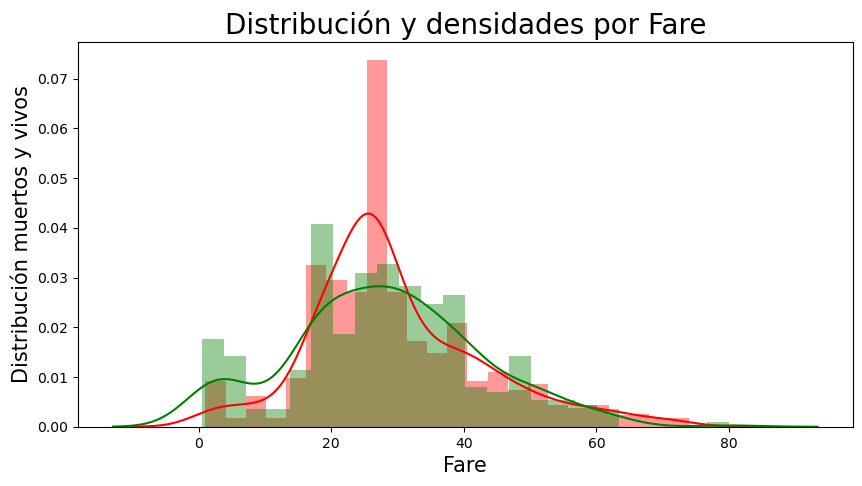

In [34]:
fare_muerto = df_titanic2[(df_titanic2["Fare"]>0) & (df_titanic2["Survived"] == 0)]
fare_vivo = df_titanic2[(df_titanic2["Fare"]>0) & (df_titanic2["Survived"] == 1)]

plt.figure(figsize=(10,5))
sns.distplot(fare_muerto["Age"], bins=24, color='r')
sns.distplot(fare_vivo["Age"], bins=24, color='g')
plt.title("Distribución y densidades por Fare", fontsize=20)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Distribución muertos y vivos", fontsize=15)
plt.show()

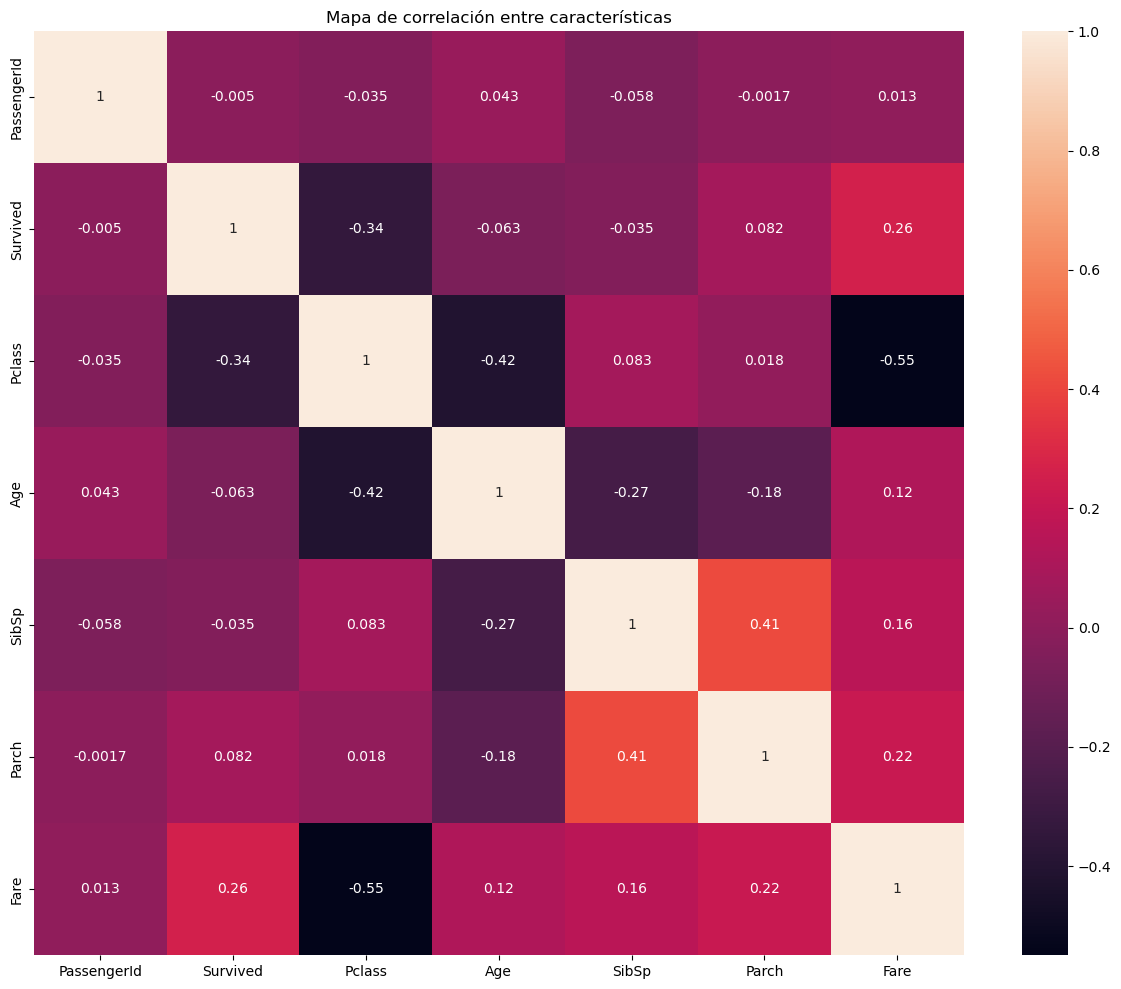

In [35]:
#Finalmemte
#Retiramos variables
df_titanic2filtrado = pd.get_dummies(df_titanic2, columns=["Sex", "Embarked", "Edad_cat", "Title"], prefix=["Sex","Emb","Age","Prefix"])
columnas = df_titanic2.select_dtypes(include = [np.number]).columns.tolist()
plt.figure(figsize=(15,12))
plt.title("Mapa de correlación entre características")
sns.heatmap(df_titanic2[columnas].astype(float).corr(), vmax=1, annot=True)
plt.show()